# Email spam detection

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
#importing necessory libraries

In [4]:
df = pd.read_csv(r"C:\Users\kavya\Documents\spam.csv",encoding = 'latin-1')

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2141,ham,Alright took the morphine. Back in yo.,NaN,NaN,NaN
836,spam,Do you want 750 anytime any network mins 150 t...,NaN,NaN,NaN
3349,ham,Sorry i cant take your call right now. It so h...,NaN,NaN,NaN
1097,ham,Don't fret. I'll buy the ovulation test strips...,NaN,NaN,NaN
3115,ham,Uncle Abbey! Happy New Year. Abiola,NaN,NaN,NaN
4852,ham,I'm fine. Hope you are also,NaN,NaN,NaN
3589,ham,I am in escape theatre now. . Going to watch K...,NaN,NaN,NaN
2646,ham,"Em, its olowoyey@ usc.edu have a great time in...",NaN,NaN,NaN
1018,ham,Nope watching tv at home... Not going out. V b...,NaN,NaN,NaN
1342,ham,Yeah I'll try to scrounge something up,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
print("Rows_ _ _>",df.shape[0])
print("columns_ _ _>",df.shape[1])

Rows_ _ _> 5572
columns_ _ _> 5


In [9]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [54]:
df.drop_duplicates(inplace=True)
print(df.shape)

(5171, 4)


In [55]:
print(df.isnull().sum())

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [56]:
df.isna().mean()

Unnamed: 0    0.0
label         0.0
text          0.0
label_num     0.0
dtype: float64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  5171 non-null   int64
dtypes: int64(1)
memory usage: 40.5 KB


In [10]:
df.describe()   #give Description about dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [11]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df=df.rename(columns={'v1':'Target','v2':'Message'})

In [14]:
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df.drop_duplicates(keep='first',inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.size

10338

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])
df['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

In [20]:
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


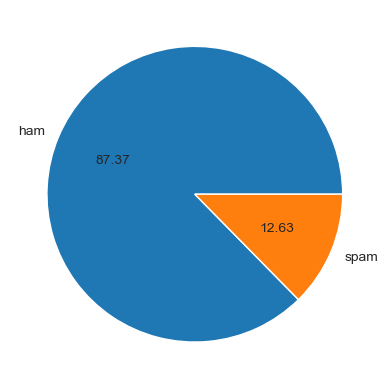

In [21]:
plt.pie(df['Target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [22]:
x=df['Message']
y=df['Target']

In [23]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object


In [24]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3) 

In [26]:
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn import svm

In [28]:
cv=CountVectorizer()
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [29]:
print(x_train_cv)


  (0, 1879)	1
  (0, 1170)	1
  (0, 6840)	1
  (0, 6610)	1
  (0, 2779)	1
  (1, 1939)	1
  (1, 4467)	1
  (1, 453)	1
  (1, 7176)	1
  (1, 7594)	1
  (1, 1577)	1
  (1, 203)	1
  (1, 4768)	1
  (1, 7175)	1
  (1, 7390)	1
  (1, 7590)	1
  (1, 4309)	1
  (1, 5157)	1
  (1, 3732)	1
  (1, 3015)	1
  (1, 2333)	1
  (1, 5210)	1
  (1, 4577)	1
  (1, 4731)	1
  (1, 5615)	1
  :	:
  (4134, 3290)	2
  (4134, 4817)	1
  (4134, 1546)	1
  (4134, 4195)	1
  (4134, 891)	1
  (4134, 1092)	1
  (4134, 1261)	1
  (4134, 7302)	1
  (4134, 6595)	1
  (4134, 1624)	1
  (4134, 1977)	1
  (4134, 7438)	1
  (4134, 6189)	1
  (4134, 6815)	1
  (4134, 2357)	1
  (4134, 4093)	1
  (4134, 6583)	1
  (4134, 5934)	1
  (4134, 1661)	1
  (4134, 5153)	1
  (4134, 6292)	1
  (4134, 3707)	1
  (4134, 6172)	1
  (4134, 3624)	1
  (4134, 4785)	1


In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() #creating model

In [31]:
lr.fit(x_train_cv,y_train)
prediction_train=lr.predict(x_train_cv)

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, prediction_train)*100)

99.75816203143893


In [33]:
prediction_test = lr.predict(x_test_cv)

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction_test)*100)

97.58220502901354
